# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [78]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
web_info = BeautifulSoup(html, 'html.parser')

In [7]:
# Extract all headers
column_headers = web_info.find_all('th')
table_rows = web_info.find_all('tr')

column_names = []
for header in column_headers:
    name = header.text
    column_names.append(name)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
row_list_data = []
# Loop through the scraped data to create a list of rows
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        row_list_data.append(row)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_df = pd.DataFrame(row_list_data, columns=column_names)

In [10]:
# Confirm DataFrame was created successfully
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
temp_df['id']= temp_df['id'].astype(int)
temp_df['terrestrial_date']= pd.to_datetime(temp_df['terrestrial_date'])
temp_df['sol']= temp_df['sol'].astype(int)
temp_df['ls']= temp_df['ls'].astype(int)
temp_df['month']= temp_df['month'].astype(int)
temp_df['min_temp']= temp_df['min_temp'].astype(float)
temp_df['pressure']= temp_df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
temp_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_months = max(temp_df['month'])
mars_months

12

In [104]:
# 2. How many Martian days' worth of data are there?
#number of Sol Readings
num_mars_days = temp_df['sol'].count()
num_mars_days

1867

In [109]:
#to show each day only has one reading
count_mars_days = temp_df['sol'].value_counts()
count_mars_days

10      1
1337    1
1349    1
1348    1
1347    1
       ..
698     1
697     1
696     1
695     1
1977    1
Name: sol, Length: 1867, dtype: int64

In [16]:
# 3. What is the average low temperature by month?
avg_low_temp = temp_df[['month','min_temp']].groupby(['month']).mean('min_temp')
avg_low_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


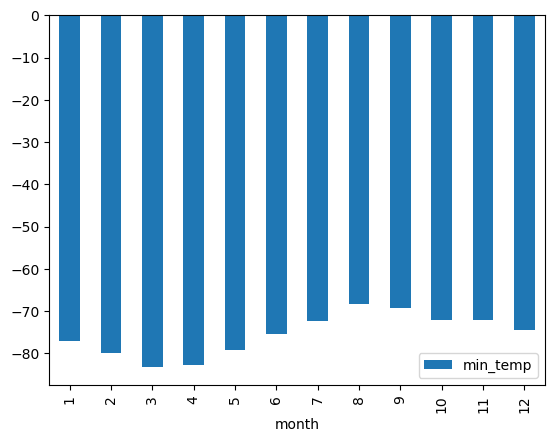

In [17]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar')
plt.show()

In [110]:
# Identify the coldest and hottest months in Curiosity's location

In [111]:
coldest_avg_month = avg_low_temp['min_temp'].min()
coldest_avg_index = avg_low_temp['min_temp'].idxmin()
print(f'The Coldest Mars month was month {coldest_avg_index} with average low temp of {coldest_avg_month}')

The Coldest Mars month was month 3 with average low temp of -83.30729166666667


In [112]:
warmest_avg_month = avg_low_temp['min_temp'].max()
warmest_avg_index = avg_low_temp['min_temp'].idxmax()
print(f'The Warmest Mars month was month {warmest_avg_index} with average low temp of {warmest_avg_month}')

The Warmest Mars month was month 8 with average low temp of -68.38297872340425


In [40]:
# 4. Average pressure by Martian month
avg_pressure = temp_df[['month','pressure']].groupby(['month']).mean('pressure')
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [114]:
lowest_avg_pressure = avg_pressure['pressure'].min()
lowest_avg_pressure_index = avg_pressure['pressure'].idxmin()
print(f'The lowest average pressure Mars month was month {lowest_avg_pressure_index} with average pressure of {lowest_avg_pressure}')

The lowest average pressure Mars month was month 6 with average pressure of 745.0544217687075


In [115]:
highest_avg_pressure = avg_pressure['pressure'].max()
highest_avg_pressure_index = avg_pressure['pressure'].idxmax()
print(f'The highest average pressure Mars month was month {highest_avg_pressure_index} with average pressure of {highest_avg_pressure}')

The highest average pressure Mars month was month 9 with average pressure of 913.3059701492538


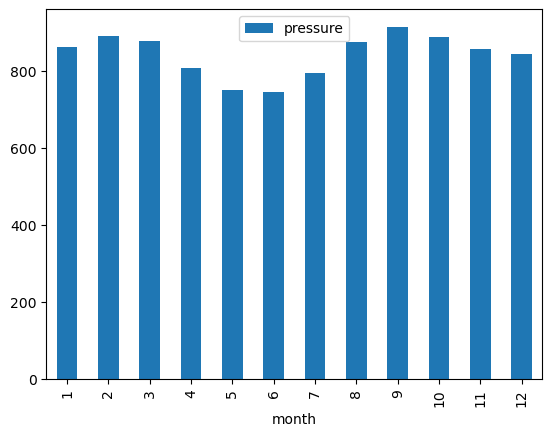

In [41]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.show()

In [99]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_sol_end = temp_df.loc[temp_df['terrestrial_date'] == '2013-08-17', 'sol'].item()
mars_sol_end


366

In [100]:
mars_sol_start = temp_df.loc[temp_df['terrestrial_date'] == '2012-08-17', 'sol'].item()
mars_sol_start

11

In [102]:
total_sols = mars_sol_end-mars_sol_start
total_sols

355

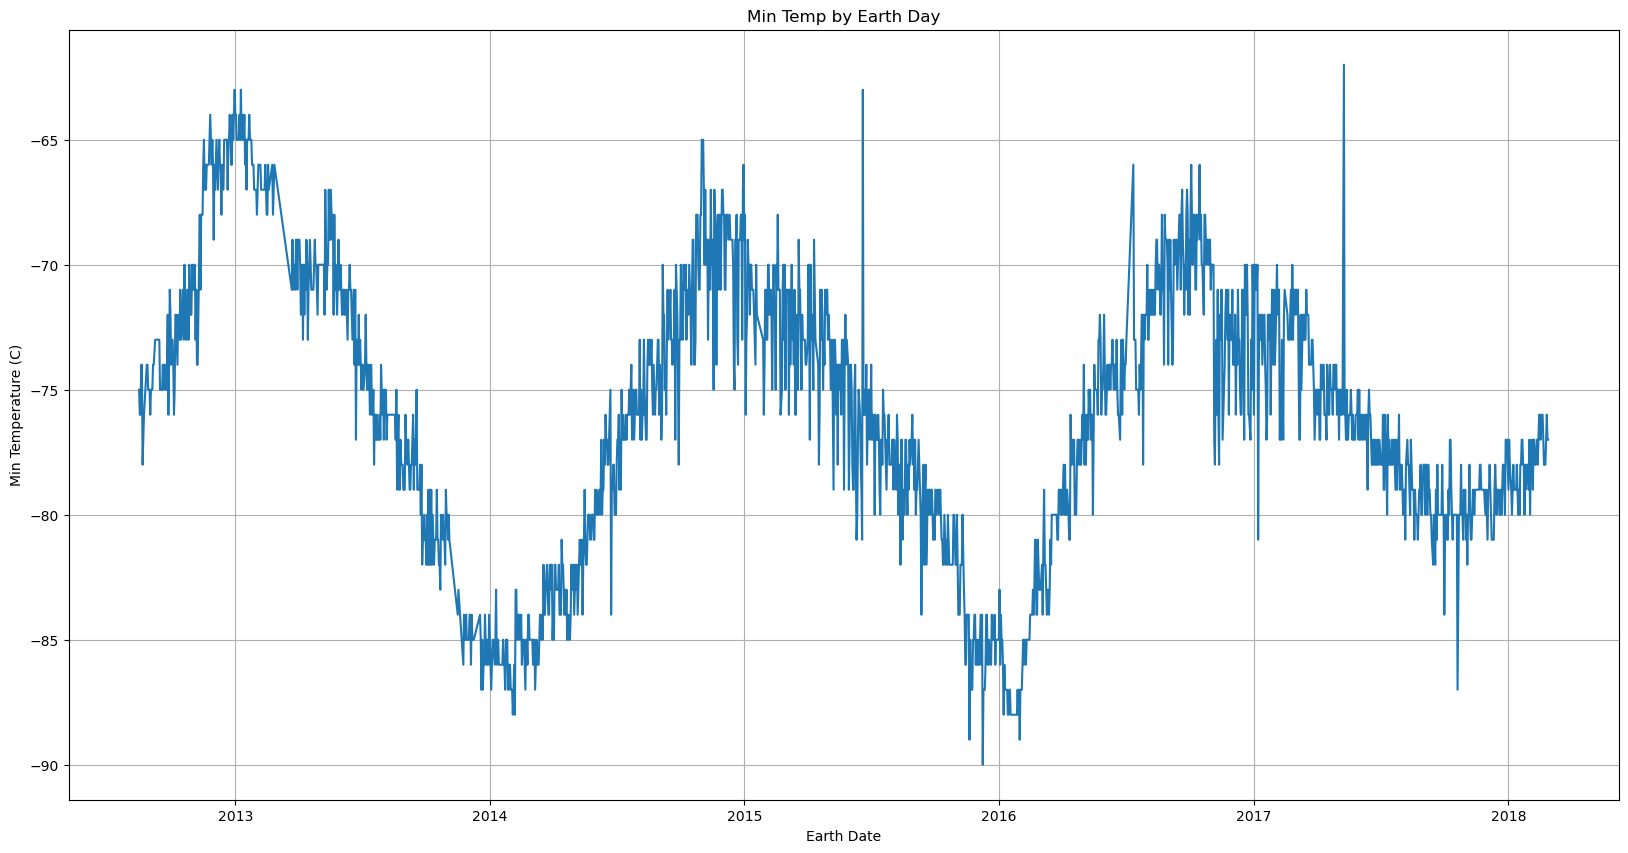

In [82]:
fig, ax = plt.subplots(figsize=[20,10])
ax = plt.plot(temp_df.terrestrial_date,temp_df.min_temp)
plt.xlabel('Earth Date')
plt.grid()
plt.ylabel('Min Temperature (C)')
plt.title('Min Temp by Earth Day')
plt.show()

On average, the month 3 has the coldest average temp with a value of -83.3, 
On Average the month 8 has the warmest average temp with a value of -68.3


On average, month 6 has the lowest atmospheric pressure with a value of 745.05.
On average, month 9 has the highest atmospheric pressure with a value of 913.30

Using, only the visual above. The highest temperature seems to be just under a 2 year period(in Earth time) Since this would be a yearly cycle for Mars you can estimate that the Mars year is a little less than 730 Earth days. (365 * 2 = 730). an additional approach i had was to calculate the number of sols between two dates one earth-year apart. Multiply that number by two and received an estimate of 710 earth days between peaks. 
Using confirmed figures from Internet search (Nasa.gov)confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [103]:
# Write the data to a CSV
temp_df.to_csv("temp_df.csv")

In [ ]:
browser.quit()